<a href="https://colab.research.google.com/github/ZongZong0210/MarketDataScience/blob/master/%E8%B3%87%E8%A8%8A%E7%A7%91%E5%AD%B8%E6%A6%82%E8%AB%96%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1113作業-關聯規則

In [ ]:
# 下載套件
!pip install efficient-apriori
!pip install apyori

In [ ]:
from efficient_apriori import apriori
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
from google.colab import drive

In [ ]:
drive.mount('/content/drive/') #與google drive牽連再一起
!ls /content/drive/"My Drive"/"學校功課"/"Colab Notebooks"/
# 載入檔案
df = pd.read_csv('/content/drive/My Drive/學校功課/Colab Notebooks/資料/Groceries_dataset.csv')
df.head()

In [ ]:
df.shape #找出共有38765筆資料，並且共有3行

In [ ]:
df.info()  #找出該欄位的屬性

In [ ]:
df.Date = pd.to_datetime(df.Date) 
df['Year'] = df.Date.apply(lambda x : x.year)
df['Month'] = df.Date.apply(lambda x : x.month)
df['Days of Week'] = df.Date.apply(lambda x : x.dayofweek)
df.nunique()

In [ ]:
sns.countplot(df.Year)
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(df.Month)
plt.show()
plt.figure(figsize=(12,4))
sns.countplot(df.Month,hue=df.Year)
plt.show()

In [ ]:
df[df['Year']==2014].groupby('Month').count()['Date'].plot(label=2014,figsize=(12,4))
df[df['Year']==2015].groupby('Month').count()['Date'].plot(label=2015)
plt.xticks([i for i in range(1,13)])
plt.legend()
plt.show()

In [ ]:
df.itemDescription.value_counts().head(15).plot(kind='bar',figsize=(15,6))
plt.show()

In [ ]:
dummies = pd.get_dummies(df.itemDescription)
dummies.head()
df = df.join(dummies)

In [ ]:
df.head()
item = df.itemDescription.unique()


In [ ]:
df = df.groupby(['Member_number','Date'])[item[:]].sum()
df.head(10)

In [ ]:
df = df.reset_index() #整理表格，將member_number與date向上合併
df.head(10)

In [ ]:
df = df.drop(['Member_number','Date'],axis=1)  #將不要的欄位丟去
df.head(10)

In [ ]:
temp = df.copy()
x = 0
for i in range(len(temp)):
    for j in (temp.columns):
        if temp.loc[i,j]> x:
            temp.loc[i,j]=j
temp.head(10)

In [ ]:
x = temp.values
x = [sub[~(sub == 0)].tolist() for sub in x if sub[sub != 0].tolist()]
transactions = x

In [ ]:
rules = apriori(transactions,min_support=0.0004,min_confidance=0.06,min_lift=3,target="rules")
association_results = list(rules)
print(association_results[1])

In [ ]:
# 使用關聯規則演算法
itemsets, rules = apriori(X, min_support=0.003, min_confidence=0.2)
list(rules)

# 1120作業-分群

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_mutual_info_score
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [ ]:
drive.mount('/content/drive/') #與google drive牽連再一起
!ls /content/drive/"My Drive"/"學校功課"/"Colab Notebooks"/
# 載入檔案
df = pd.read_csv('/content/drive/My Drive/學校功課/Colab Notebooks/資料/UCI_Credit_Card.csv')
df.head()

Mounted at /content/drive/
'「1091 資料科學_應用習題」的副本'   20200713_1.ipynb   Untitled
 20200709.ipynb			     20200713.ipynb     Untitled0.ipynb
 20200711.ipynb			     20200714_1.ipynb   資料


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# 使用info查看資料架構
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.shape

(30000, 25)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
for i in ['SEX','EDUCATION','MARRIAGE'] :
    print(df[i].value_counts())
    print()

2    18112
1    11888
Name: SEX, dtype: int64

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64



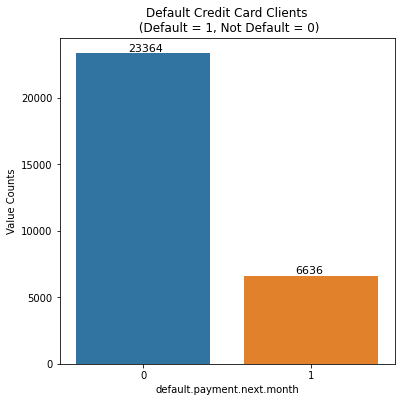

In [ ]:
banyak = df['default.payment.next.month'].value_counts()
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients\n (Default = 1, Not Default = 0)')
sns.barplot(x = banyak.index, y = banyak.values)
for i, v in enumerate(banyak.values):
    plt.text(i-.09 , v + 150, str(v),fontsize=11)
plt.xlabel('default.payment.next.month')
plt.ylabel('Value Counts')
plt.show()

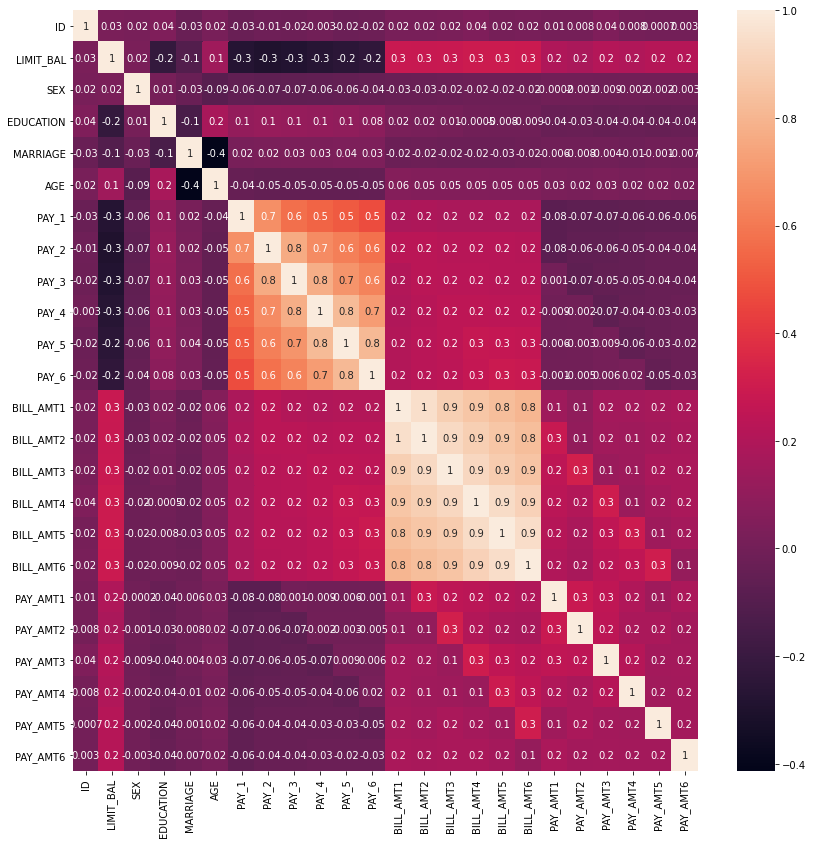

In [ ]:
df.rename(columns = {'PAY_0':'PAY_1','default.payment.next.month':'default'}, inplace=True)
y_target = df['default']
x_features = df.drop('default', axis=1)
corr = x_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [ ]:
cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]
print('目標屬性:', cols_bill)

# 創建PCA目標項並進行擬合以計算
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(x_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA組件的變異率:', pca.explained_variance_ratio_)

目標屬性: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA組件的變異率: [0.90555253 0.0509867 ]


In [ ]:
rcf = RandomForestClassifier(n_estimators=300,random_state=156)
scores = cross_val_score(rcf, x_features, y_target, scoring='accuracy', cv=3)

print('CV=3時，各組精度', scores)
print('平均準確度: {0:.4f}'.format(np.mean(scores)))


CV=3時，各組精度 [0.257  0.8209 0.784 ]
平均準確度: 0.6206


In [ ]:
df = df.drop(['ID','default'],axis=1)  #將不要的欄位丟去
df = df.dropna(axis=0)

pca = PCA(n_components=2)
df = pca.fit_transform(df)
print(pca)
print(df)

NameError: ignored

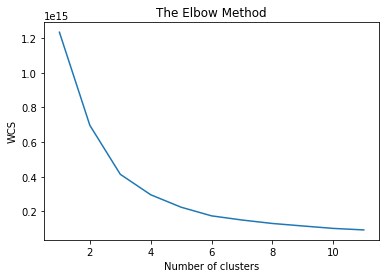

In [ ]:
# 算出最適分群數
wcs = []
for i in range(1, 12):
  kmeans = KMeans(n_clusters= i, random_state= 42)
  kmeans.fit(df)
  wcs.append(kmeans.inertia_)

plt.plot(range(1, 12), wcs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCS')
plt.show()

In [ ]:
# 將模型分群數調至2
kmeans = KMeans(n_clusters= 2, random_state= 42)

# 建立模型並預測
kms_predict = kmeans.fit_predict(df)

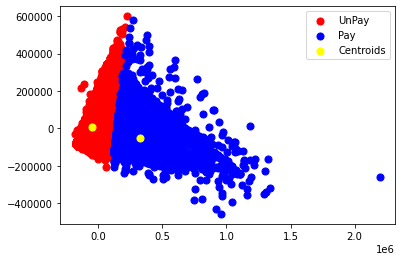

In [ ]:
# 印出各群
plt.scatter(df[kms_predict == 0, 0], df[kms_predict == 0, 1], s = 50, c = 'red', label = 'UnPay')
plt.scatter(df[kms_predict == 1, 0], df[kms_predict == 1, 1], s = 50, c = 'blue', label = 'Pay')
# plt.scatter(df[kms_predict == 2, 0], df[kms_predict == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

# 印出群心
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

# 1127作業-分類


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import LearningCurve

from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import validation_curve
from sklearn import tree

from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassBalance
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import DiscriminationThreshold


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
drive.mount('/content/drive/') #與google drive牽連再一起
!ls /content/drive/"My Drive"/"學校功課"/"Colab Notebooks"/
# 載入檔案
df = pd.read_csv('/content/drive/My Drive/學校功課/Colab Notebooks/資料/UCI_Credit_Card.csv')
print(df.head())
print(df.shape)

Mounted at /content/drive/
'「1091 資料科學_應用習題」的副本'   20200713_1.ipynb   Untitled
 20200709.ipynb			     20200713.ipynb     Untitled0.ipynb
 20200711.ipynb			     20200714_1.ipynb   資料
   ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default.payment.next.month
0   1    20000.0    2  ...       0.0       0.0                           1
1   2   120000.0    2  ...       0.0    2000.0                           1
2   3    90000.0    2  ...    1000.0    5000.0                           0
3   4    50000.0    2  ...    1069.0    1000.0                           0
4   5    50000.0    1  ...     689.0     679.0                           0

[5 rows x 25 columns]
(30000, 25)


In [ ]:
# 使用info查看資料架構
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [ ]:
df.rename(columns = {'PAY_0':'PAY_1','default.payment.next.month':'default'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [ ]:
for i in ['SEX','EDUCATION','MARRIAGE'] :
    print(df[i].value_counts())
    print()

2    18112
1    11888
Name: SEX, dtype: int64

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64



2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1784c982e8>]],
      dtype=object)

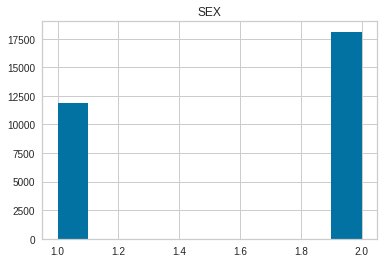

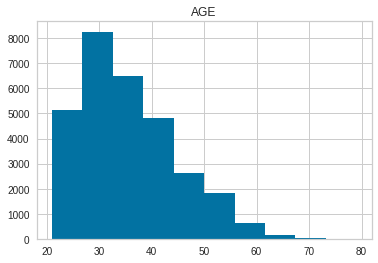

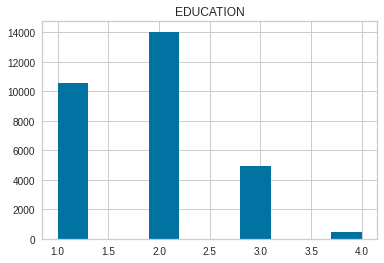

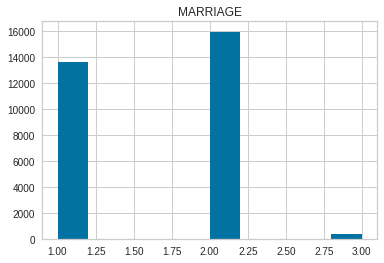

In [ ]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
print(df['EDUCATION'].value_counts())

fil = (df['MARRIAGE'] == 0)
df.loc[fil, 'MARRIAGE'] = 3
print(df['MARRIAGE'].value_counts())

df.hist('SEX')
df.hist('AGE')
df.hist('EDUCATION')
df.hist('MARRIAGE')

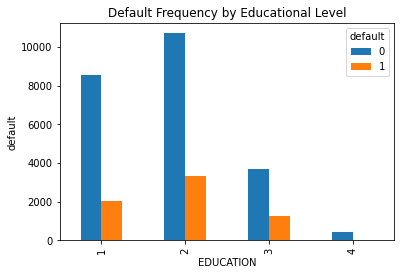

In [ ]:
pd.crosstab(df.EDUCATION,df.default).plot(kind='bar')
plt.title('Default Frequency by Educational Level')
plt.xlabel('EDUCATION')
plt.ylabel('default')
plt.show()

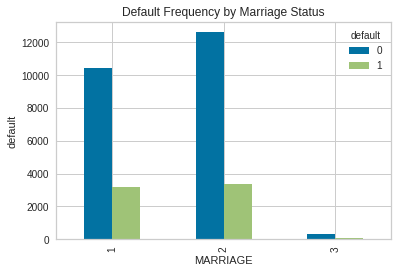

In [ ]:
# Marriage
# 1: 已婚、2：未婚、3：其他

pd.crosstab(df.MARRIAGE,df.default).plot(kind='bar')
plt.title('Default Frequency by Marriage Status')
plt.xlabel('MARRIAGE')
plt.ylabel('default')
plt.show()

In [ ]:
X=df.drop("default",axis=1)
y=df["default"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=42)

In [ ]:
rfc=RandomForestClassifier()
model=rfc.fit(X_train,y_train)
predictions=model.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      9357
           1       0.63      0.37      0.47      2643

    accuracy                           0.81     12000
   macro avg       0.74      0.66      0.68     12000
weighted avg       0.80      0.81      0.80     12000

[[8787  570]
 [1658  985]]


In [ ]:
print("accuracy:",accuracy_score(y_test,predictions))
print("precision:",precision_score(y_test,predictions))
print("recall:",recall_score(y_test,predictions))
print("error:",mean_squared_error(y_test, predictions))

accuracy: 0.8143333333333334
precision: 0.6334405144694534
recall: 0.3726825576995838
error: 0.18566666666666667


In [ ]:
q = df.drop(columns=['ID','default'])
w = df.default
q = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(q,w,test_size = 0.3, random_state=42)
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train,y_train)
dt.score(X_test, y_test)
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
dt.fit(X_train,y_train)
dt.score(X_test, y_test)




0.82

In [ ]:
print("Decision Tree accuracy : ", accuracy_score(y_test, dt.predict(X_test)))
print("Decision Tree recall : ", recall_score(y_test, dt.predict(X_test)))
print("Decision Tree precision : ", precision_score(y_test, dt.predict(X_test)))

Decision Tree accuracy :  0.82
Decision Tree recall :  0.3051020408163265
Decision Tree precision :  0.6985981308411215


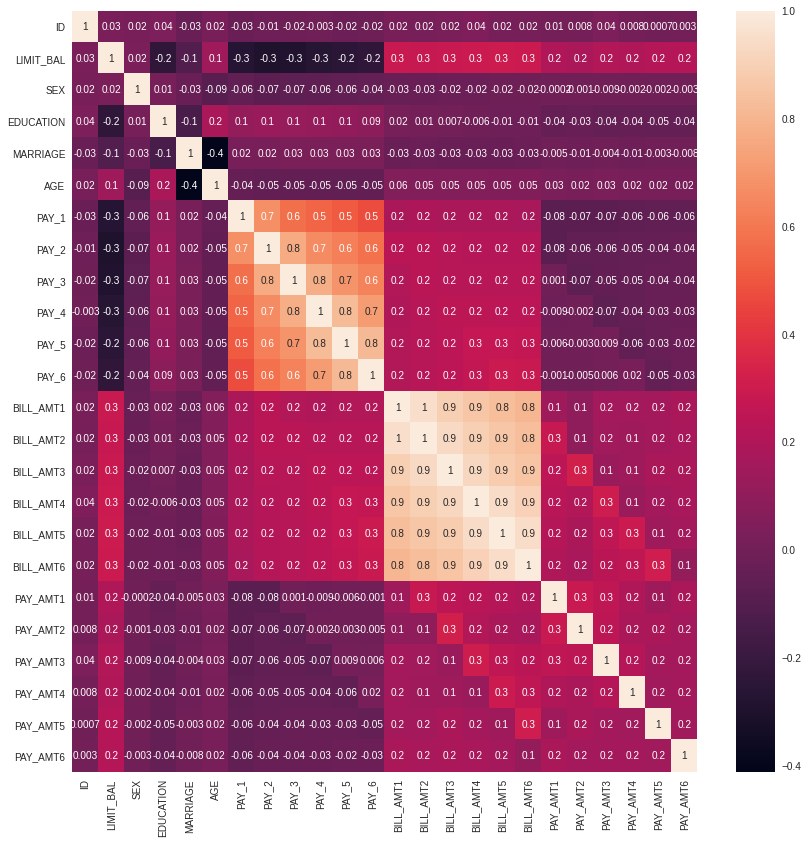

In [ ]:
y_target = df['default']
x_features = df.drop('default', axis=1)
corr = x_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [ ]:
for col, val in sorted(zip(X.columns, dt.feature_importances_),key=lambda x: x[1], reverse=True)[:10]:print(f"{col:10}{val:10.3f}")



PAY_1          0.779
PAY_2          0.158
PAY_AMT3       0.049
PAY_3          0.013
ID             0.000
LIMIT_BAL      0.000
SEX            0.000
EDUCATION      0.000
MARRIAGE       0.000
AGE            0.000


0.82

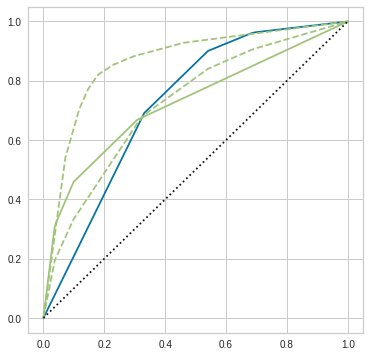

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
roc_viz = ROCAUC(dt)
roc_viz.score(X_test,y_test)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf
Iteration 9, loss = inf
Iteration 10, loss = inf
Iteration 11, loss = inf
Iteration 12, loss = inf
Iteration 13, loss = inf
Iteration 14, loss = inf
Iteration 15, loss = inf
Iteration 16, loss = inf
Iteration 17, loss = inf
Iteration 18, loss = inf
Iteration 19, loss = inf
Iteration 20, loss = inf
Iteration 21, loss = inf
Iteration 22, loss = inf
Iteration 23, loss = inf
Iteration 24, loss = inf
Iteration 25, loss = inf
Iteration 26, loss = inf
Iteration 27, loss = inf
Iteration 28, loss = inf
Iteration 29, loss = inf
Iteration 30, loss = inf
Iteration 31, loss = inf
Iteration 32, loss = inf
Iteration 33, loss = inf
Iteration 34, loss = inf
Iteration 35, loss = inf
Iteration 36, loss = inf
Iteration 37, loss = inf
Iteration 38, loss = inf
Iteration 39, loss = inf
Iteration 40, loss = inf
Iteration

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-------RandomForest-------
acc=0.8017777777777778
f1=0.40848806366047746
-------DecsionTree-------
acc=0.7287777777777777
f1=0.4009815950920246
-------Ann-------
acc=0.7428888888888889
f1=0.3819444444444444
confusion martix


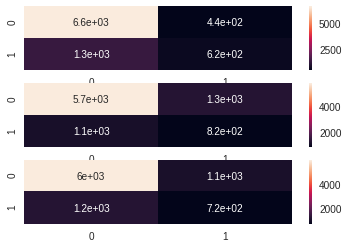

In [ ]:
# 載入模型
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

tr = tree.DecisionTreeClassifier(random_state=42)
tr.fit(X_train, y_train)

ann = MLPClassifier(random_state=42, verbose=True)
ann.fit(X_train, y_train)

# 預測
rf_predict = rf.predict(X_test)
tr_predict = tr.predict(X_test)
ann_predict = ann.predict(X_test)

# 模型效能指標
rf_acc = accuracy_score(y_test, rf_predict)
rf_f1 = f1_score(y_test, rf_predict)
tr_acc = accuracy_score(y_test, tr_predict)
tr_f1 = f1_score(y_test, tr_predict)
ann_acc = accuracy_score(y_test, ann_predict)
ann_f1 = f1_score(y_test, ann_predict)

# 混淆矩陣
rf_confusion = confusion_matrix(y_test, rf_predict)
tr_confusion = confusion_matrix(y_test, tr_predict)
ann_confusion = confusion_matrix(y_test, ann_predict)


print("-------RandomForest-------")
print("acc={}".format(rf_acc))
print("f1={}".format(rf_f1))

print("-------DecsionTree-------")
print("acc={}".format(tr_acc))
print("f1={}".format(tr_f1))

print("-------Ann-------")
print("acc={}".format(ann_acc))
print("f1={}".format(ann_f1))


print("confusion martix")
fig, ax = plt.subplots(nrows=3)
sns.heatmap(rf_confusion, annot=True, ax=ax[0])
sns.heatmap(tr_confusion, annot=True, ax=ax[1])
sns.heatmap(ann_confusion, annot=True, ax=ax[2])

In [ ]:
import eli5
eli5.show_weights(dt)

Weight,Feature
0.7795,x6
0.1580,x7
0.0491,x20
0.0133,x8
0,x16
0,x3
0,x4
0,x5
0,x9
0,x10


In [ ]:
!pip install eli5

     |████████████████████████████████| 112kB 5.6MB/s 


# 1204作業-回歸

In [ ]:
from google.colab import drive
import warnings
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
drive.mount('/content/drive/') #與google drive牽連再一起
!ls /content/drive/"My Drive"/"學校功課"/"Colab Notebooks"/
# 載入檔案
bike_sample = pd.read_csv('/content/drive/My Drive/學校功課/Colab Notebooks/資料/bike_sample.csv')
bike_test = pd.read_csv('/content/drive/My Drive/學校功課/Colab Notebooks/資料/bike_test.csv')
bike_train = pd.read_csv('/content/drive/My Drive/學校功課/Colab Notebooks/資料/bike_train.csv')


Mounted at /content/drive/
'「1091 資料科學_應用習題」的副本'   20200713_1.ipynb   Untitled
 20200709.ipynb			     20200713.ipynb     Untitled0.ipynb
 20200711.ipynb			     20200714_1.ipynb   資料


In [ ]:
print(bike_sample.head())
print(bike_sample.shape)

              datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0
(6493, 2)


In [ ]:
# print(bike_test.head())
# print(bike_test.shape)
print(bike_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB
None


In [ ]:
# print(bike_train.head())
# print(bike_train.shape)
print(bike_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [ ]:
bike_all = bike_train.append(bike_test,ignore_index= True)
print(bike_all.head())
print(bike_all.shape)

              datetime  season  holiday  ...  casual  registered  count
0  2011-01-01 00:00:00       1        0  ...     3.0        13.0   16.0
1  2011-01-01 01:00:00       1        0  ...     8.0        32.0   40.0
2  2011-01-01 02:00:00       1        0  ...     5.0        27.0   32.0
3  2011-01-01 03:00:00       1        0  ...     3.0        10.0   13.0
4  2011-01-01 04:00:00       1        0  ...     0.0         1.0    1.0

[5 rows x 12 columns]
(17379, 12)


In [ ]:
bike_all.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,10886.000000,10886.000000,10886.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,36.021955,155.552177,191.574132
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,118.000000,145.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
bike_all['date'] = bike_all.datetime.apply( lambda a : a.split( )[0]) 
bike_all['year'] = bike_all.datetime.apply( lambda a : a.split( )[0].split('-')[0]).astype('int')
bike_all['month'] = bike_all.datetime.apply( lambda a : a.split( )[0].split('-')[1]).astype('int')
bike_all['day'] = bike_all.datetime.apply( lambda a : a.split( )[0].split('-')[2]).astype('int')
bike_all['weekend'] = bike_all.date.apply( lambda a : datetime.strptime( a , '%Y-%m-%d').isoweekday())
bike_all['hour'] = bike_all.datetime.apply( lambda a : a.split( )[1].split(':')[0]).astype('int')
# Delete datetime
# bike_all.drop(['datetime','casual','registered'], axis = 1 , inplace = True)
bike_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,weekend,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,2011,1,1,6,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,2011,1,1,6,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2011,1,1,6,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,2011,1,1,6,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,2011,1,1,6,4


In [ ]:
drop_col = ['datetime','date','datetime','casual','registered']
all_df = bike_all.drop(drop_col, axis=1)

In [ ]:
corr_all = all_df.corr()
corr_all['count'].sort_values(ascending=False)

count         1.000000
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
day           0.019826
workingday    0.011594
weekend      -0.002283
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

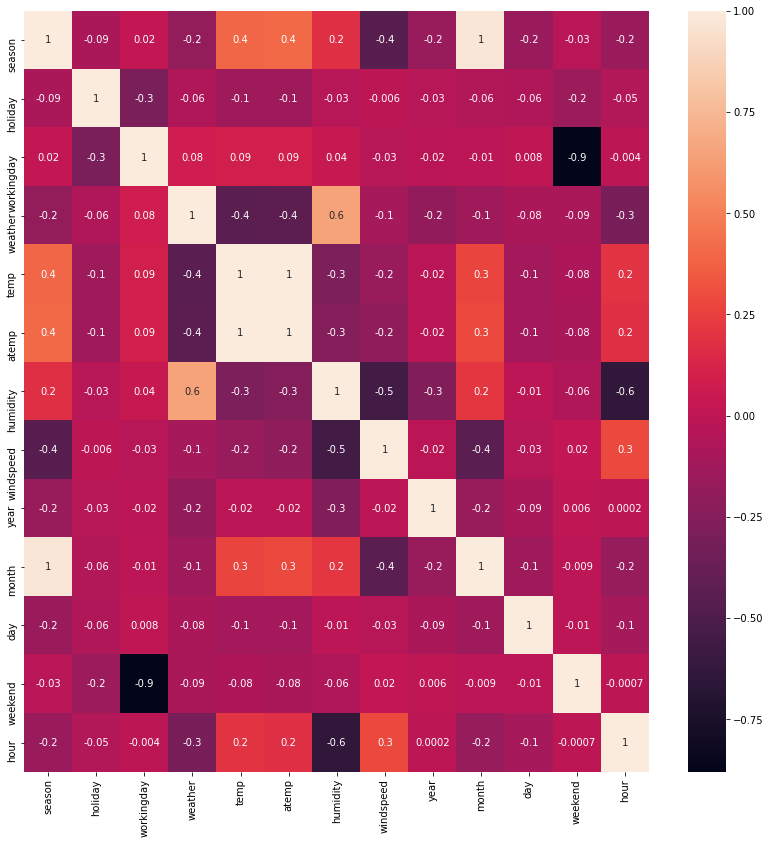

In [ ]:
y_target = corr_all['count']
x_features = corr_all.drop('count', axis=1)
corr = x_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


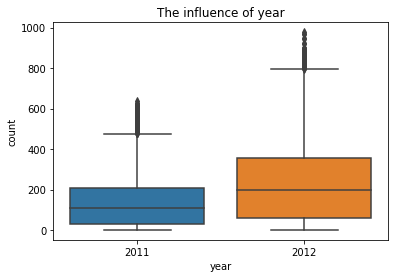

In [ ]:
sns.boxplot(all_df['year'],bike_all['count'])
plt.title('The influence of year')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


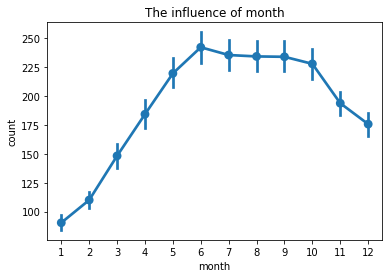

In [ ]:
sns.pointplot(all_df['month'] , bike_all['count'])
plt.title('The influence of month')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


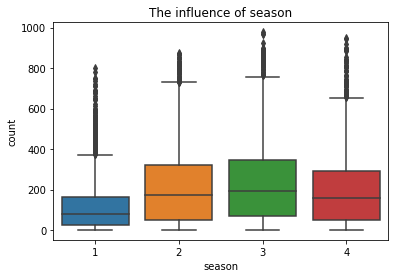

In [ ]:
sns.boxplot(all_df['season'] , bike_all['count'])
plt.title('The influence of season')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


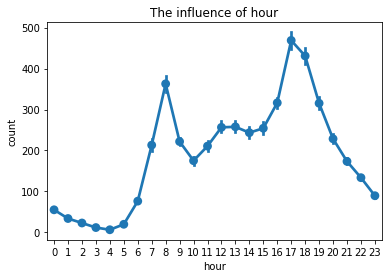

In [ ]:
sns.pointplot(all_df['hour'] , bike_all['count'])
plt.title('The influence of hour')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The influence of windspeed')

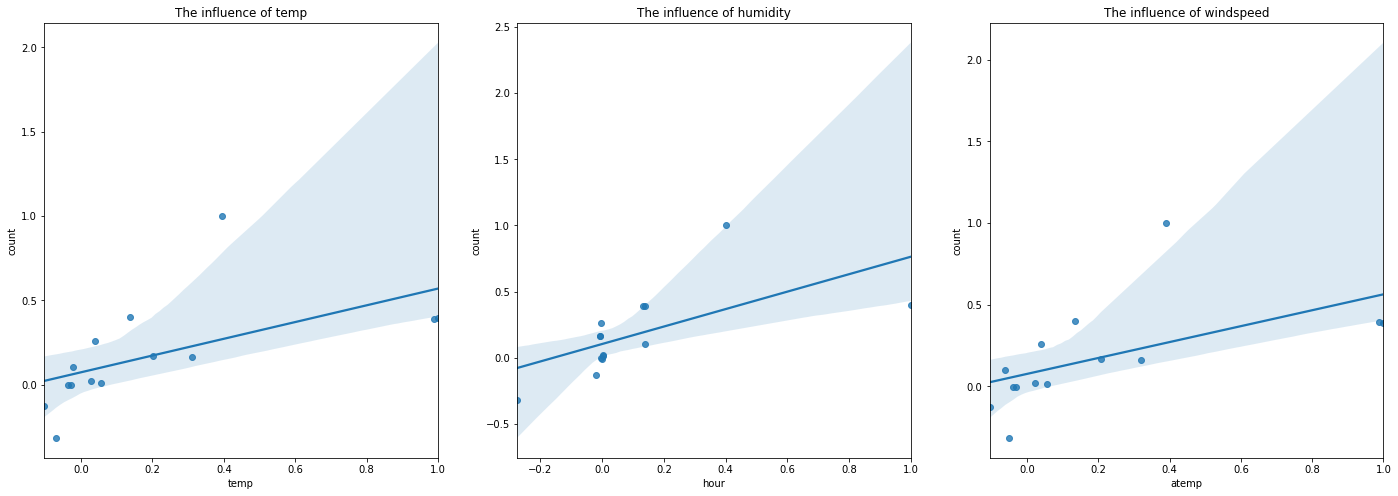

In [ ]:
fig , axes = plt.subplots(1,3,figsize = (24,8))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
sns.regplot(corr_all['temp'] , corr_all['count'] , ax = ax1)
sns.regplot(corr_all['hour'] , corr_all['count'] , ax = ax2)
sns.regplot(corr_all['atemp'] , corr_all['count'] , ax = ax3)
ax1.set_title('The influence of temp')
ax2.set_title('The influence of humidity')
ax3.set_title('The influence of windspeed')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The influence of windspeed')

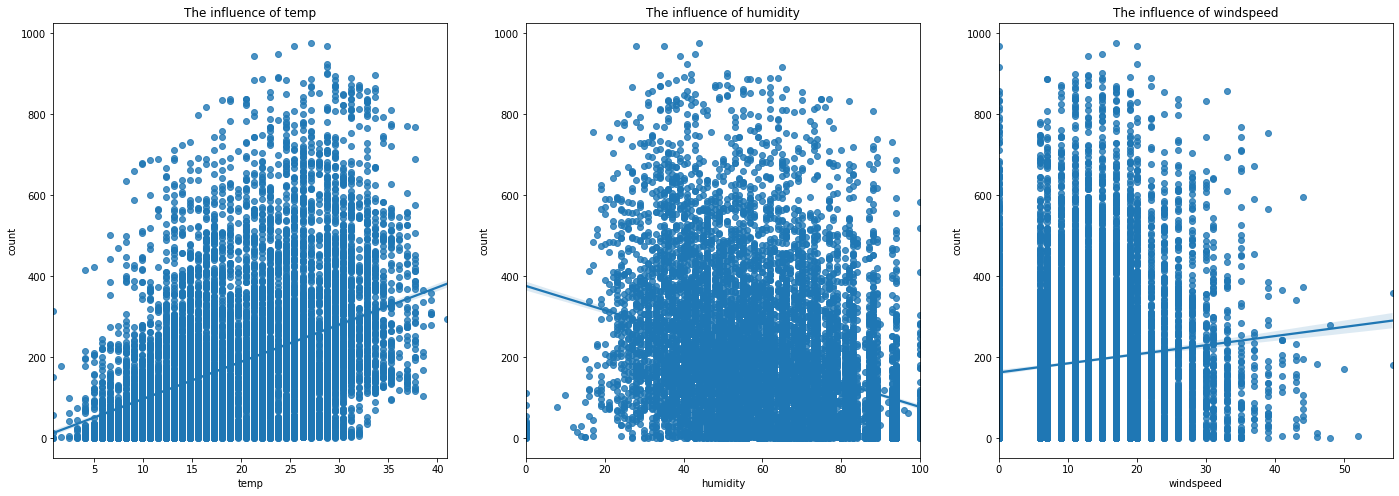

In [ ]:
fig , axes = plt.subplots(1,3,figsize = (24,8))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
sns.regplot(bike_all['temp'] , bike_all['count'] , ax = ax1)
sns.regplot(bike_all['humidity'] , bike_all['count'] , ax = ax2)
sns.regplot(bike_all['windspeed'] , bike_all['count'] , ax = ax3)
ax1.set_title('The influence of temp')
ax2.set_title('The influence of humidity')
ax3.set_title('The influence of windspeed')

In [ ]:
all_df.head()
all_df = all_df.reindex(columns=['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','year','month','day','weekend','hour','count'])
print(all_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   holiday     17379 non-null  int64  
 2   workingday  17379 non-null  int64  
 3   weather     17379 non-null  int64  
 4   temp        17379 non-null  float64
 5   atemp       17379 non-null  float64
 6   humidity    17379 non-null  int64  
 7   windspeed   17379 non-null  float64
 8   casual      0 non-null      float64
 9   registered  0 non-null      float64
 10  year        17379 non-null  int64  
 11  month       17379 non-null  int64  
 12  day         17379 non-null  int64  
 13  weekend     17379 non-null  int64  
 14  hour        17379 non-null  int64  
 15  count       10886 non-null  float64
dtypes: float64(6), int64(10)
memory usage: 2.1 MB
None


In [ ]:
X = all_df.iloc[:, :-1]
y = all_df.iloc[:, -1]

# 切分資料為 訓練8:測試2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 載入模型
ln = LinearRegression()
ln.fit(X_train, y_train)

# 預測
ln_predict = ln.predict(X_test)

# 模型效能指標
ln_mse = mean_squared_error(y_test, ln_predict, squared=False)
ln_r2 = r2_score(y_test, ln_predict)

print("ln_mse={}".format(ln_mse))
print("ln_r2={}".format(ln_r2))

ln_mse=9.129782213423233e-14
ln_r2=1.0


In [ ]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

rfr_predict = rfr.predict(X_test)
rfr_mse = mean_squared_error(y_test, rfr_predict, squared=False)
rfr_r2 = r2_score(y_test, rfr_predict)

print("rfr_mse={}".format(rfr_mse))
print("rfr_r2={}".format(rfr_r2))

rfr_mse=3.0108129971124526
rfr_r2=0.9997253609077605


[Text(558.0, 475.65000000000003, 'registered <= 200.5\nmse = 33162.82\nsamples = 5513\nvalue = 191.191'),
 Text(279.0, 339.75, 'registered <= 84.5\nmse = 6521.937\nsamples = 3909\nvalue = 97.164'),
 Text(139.5, 203.85000000000002, 'registered <= 36.5\nmse = 978.749\nsamples = 2198\nvalue = 36.65'),
 Text(69.75, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 203.85000000000002, 'registered <= 143.5\nmse = 2886.458\nsamples = 1711\nvalue = 174.974'),
 Text(348.75, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 67.94999999999999, '\n  (...)  \n'),
 Text(837.0, 339.75, 'registered <= 453.0\nmse = 23491.374\nsamples = 1604\nvalue = 422.337'),
 Text(697.5, 203.85000000000002, 'casual <= 148.5\nmse = 10323.077\nsamples = 1293\nvalue = 368.435'),
 Text(627.75, 67.94999999999999, '\n  (...)  \n'),
 Text(767.25, 67.94999999999999, '\n  (...)  \n'),
 Text(976.5, 203.85000000000002, 'registered <= 613.5\nmse = 14370.859\nsamples = 311\nvalu

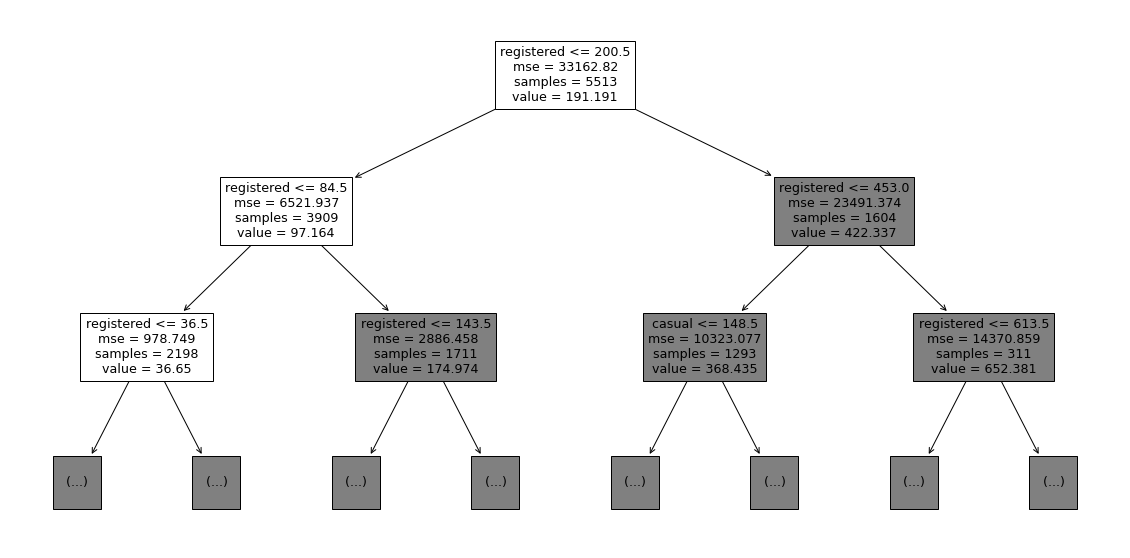

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
plot_tree(rfr.estimators_[0], max_depth=2, ax=ax, feature_names=X_train.columns)

In [ ]:
drop_col = ['datetime','casual','registered']
df = bike_train.drop(drop_col, axis=1)

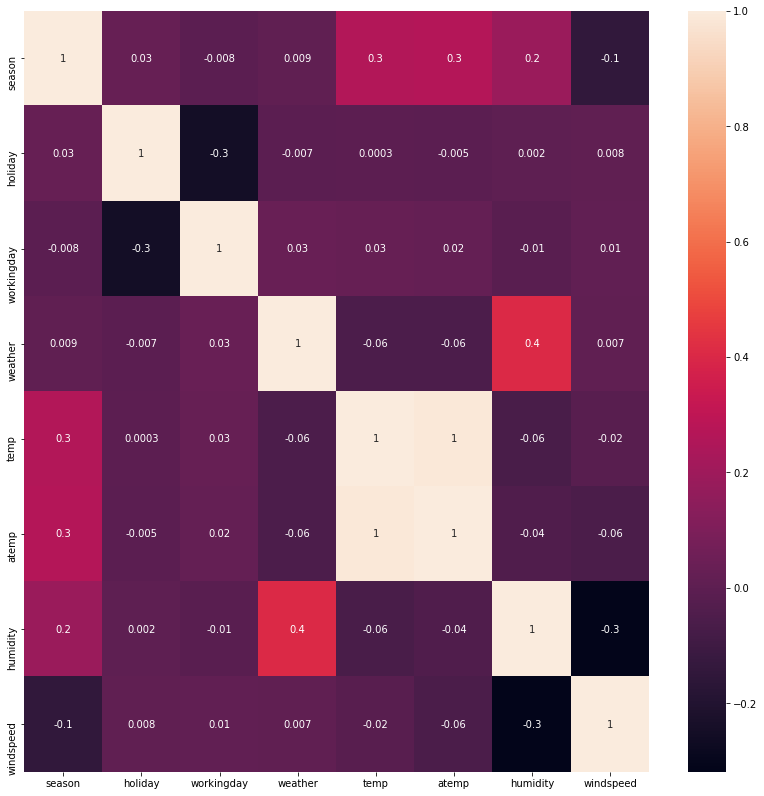

In [ ]:
y_target = df['count']
x_features = df.drop('count', axis=1)
corr = x_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 切分資料為 訓練8:測試2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 載入模型
df_ln = LinearRegression()
df_ln.fit(X_train, y_train)

# 預測
df_ln_predict = df_ln.predict(X_test)

# 模型效能指標
df_ln_mse = mean_squared_error(y_test, df_ln_predict, squared=False)
df_ln_r2 = r2_score(y_test, df_ln_predict)

print("ln_mse={}".format(df_ln_mse))
print("ln_r2={}".format(df_ln_r2))


ln_mse=154.61828705937762
ln_r2=0.2757033009386365


In [ ]:
df_rfr = RandomForestRegressor(random_state=42)
df_rfr.fit(X_train, y_train)

df_rfr_predict = df_rfr.predict(X_test)
df_rfr_mse = mean_squared_error(y_test, df_rfr_predict, squared=False)
df_rfr_r2 = r2_score(y_test, df_rfr_predict)

print("rfr_mse={}".format(df_rfr_mse))
print("rfr_r2={}".format(df_rfr_r2))

rfr_mse=151.40273273711932
rfr_r2=0.30551604141633937


[Text(558.0, 475.65000000000003, 'atemp <= 29.925\nmse = 33162.82\nsamples = 5513\nvalue = 191.191'),
 Text(279.0, 339.75, 'temp <= 12.71\nmse = 24047.999\nsamples = 3875\nvalue = 150.561'),
 Text(139.5, 203.85000000000002, 'temp <= 11.07\nmse = 11437.497\nsamples = 1068\nvalue = 87.275'),
 Text(69.75, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 203.85000000000002, 'humidity <= 64.5\nmse = 26770.808\nsamples = 2807\nvalue = 174.966'),
 Text(348.75, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 67.94999999999999, '\n  (...)  \n'),
 Text(837.0, 339.75, 'humidity <= 55.5\nmse = 41567.517\nsamples = 1638\nvalue = 288.765'),
 Text(697.5, 203.85000000000002, 'workingday <= 0.5\nmse = 37717.849\nsamples = 818\nvalue = 357.509'),
 Text(627.75, 67.94999999999999, '\n  (...)  \n'),
 Text(767.25, 67.94999999999999, '\n  (...)  \n'),
 Text(976.5, 203.85000000000002, 'humidity <= 72.5\nmse = 36472.804\nsamples = 820\nvalue = 223.476'),
 

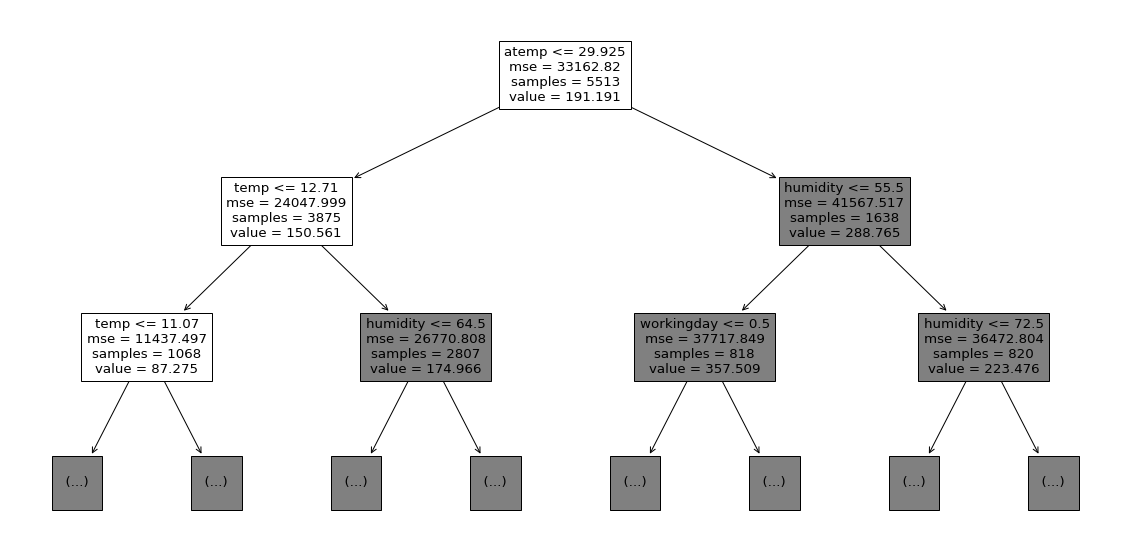

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
plot_tree(df_rfr.estimators_[0], max_depth=2, ax=ax, feature_names=X_train.columns)

In [ ]:
!pip install eli5

     |████████████████████████████████| 112kB 9.0MB/s 


In [ ]:
import eli5
eli5.show_weights(df_rfr)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.2557 ± 0.0209,x6
0.2350 ± 0.0205,x5
0.1963 ± 0.0181,x7
0.1406 ± 0.0204,x4
0.0689 ± 0.0115,x0
0.0537 ± 0.0100,x3
0.0437 ± 0.0086,x2
0.0062 ± 0.0023,x1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 765.5 KB


In [ ]:
eli5.show_weights(df_ln)

Weight?,Feature
+137.308,<BIAS>
+22.868,x0
+5.714,x5
+5.279,x3
+1.625,x4
+0.734,x7
+0.122,x2
-3.042,x6
-10.279,x1


# 0108期末考

##導入函式庫

In [78]:
!pip install eli5
from google.colab import drive
import numpy as np # 矩陣運算
import pandas as pd # 資料處理
import matplotlib.pyplot as plt #資料可視化
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #切割訓練集與測試集
from sklearn.linear_model import LogisticRegression  #羅吉斯回歸
from sklearn.ensemble import RandomForestClassifier  #隨機森林
from sklearn.tree import  DecisionTreeClassifier  #決策樹
from sklearn.svm import SVC  #SVM
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
drive.mount('/content/drive/') #與google drive牽連再一起
!ls /content/drive/"My Drive"/"學校功課"/"Colab Notebooks"/
# 載入檔案
df = pd.read_csv('/content/drive/My Drive/學校功課/Colab Notebooks/資料/heart.csv')
df.head(3) #檢查是否成功匯入，並觀測前三筆

Mounted at /content/drive/
'「1091 資料科學_應用習題」的副本'   20200713_1.ipynb   Untitled
 20200709.ipynb			     20200713.ipynb     Untitled0.ipynb
 20200711.ipynb			     20200714_1.ipynb   資料


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
print(df.info()) #查看欄位資料型態
print("\n")
print(df.isnull().sum()) #檢查是否有空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


##資料視覺化

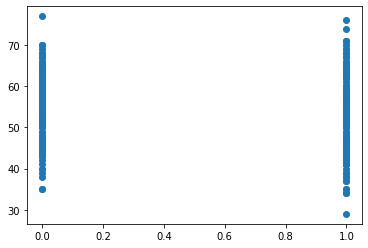

In [5]:
plt.scatter(df.target,df.age)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


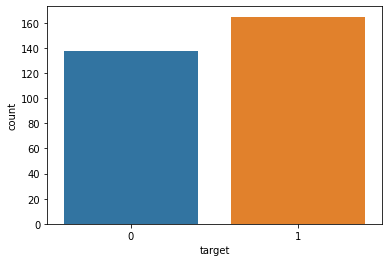

In [6]:
sns.countplot(df.target)

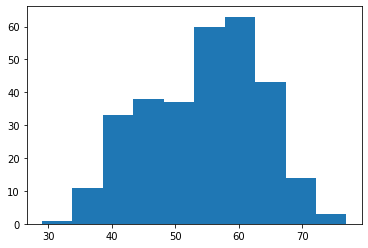

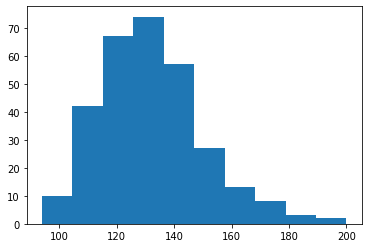

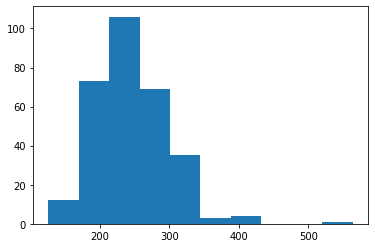

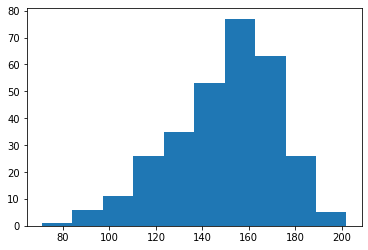

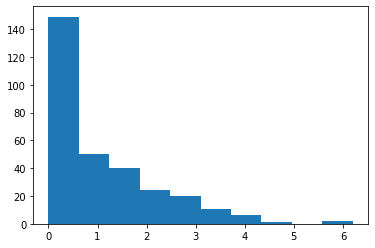

In [12]:
hist_plot=['age','trestbps','chol','thalach','oldpeak'] #連續變數，屬量
for i in hist_plot:
    plt.hist(df[i])
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


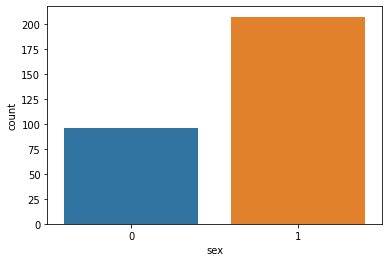

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


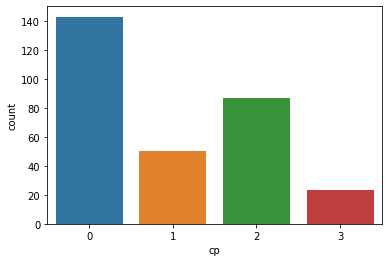

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


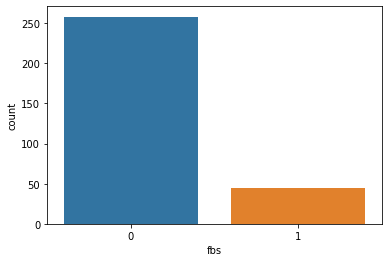

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


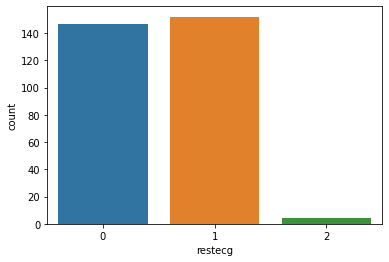

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


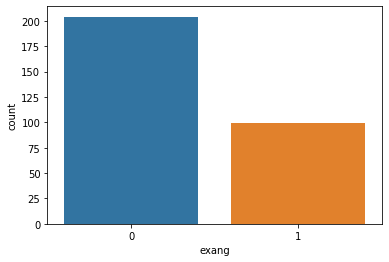

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


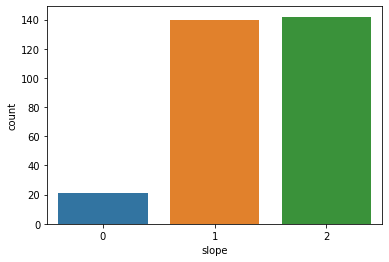

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


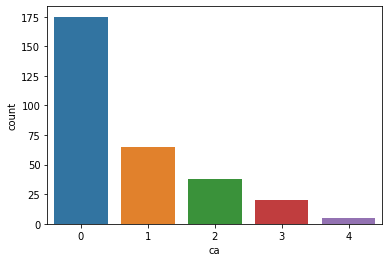

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


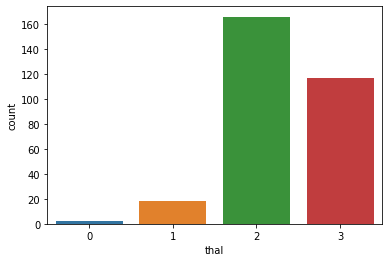

In [ ]:
no_of_count=['sex','cp','fbs','restecg','exang','slope','ca','thal'] #類別變數，屬質

for i in no_of_count:
    sns.countplot(df[i])
    plt.show()

 ## 資料處理

In [14]:
x=df.drop(['target'], axis='columns')
y=df.target
df1=x.copy()
print(x.head(3))
print(y.head(3))

   age  sex  cp  trestbps  chol  fbs  ...  thalach  exang  oldpeak  slope  ca  thal
0   63    1   3       145   233    1  ...      150      0      2.3      0   0     1
1   37    1   2       130   250    0  ...      187      0      3.5      0   0     2
2   41    0   1       130   204    0  ...      172      0      1.4      2   0     2

[3 rows x 13 columns]
0    1
1    1
2    1
Name: target, dtype: int64


In [15]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x, columns=df1.columns)
x.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922


## 訓練集

In [49]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model_params ={
        'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,25,30,40],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,15,20,25,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1,5,10,15,20,25]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
    }
}

In [50]:
scores=[]

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,svm,0.831639,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.808525,{'n_estimators': 10}
2,logistic_regression,0.834863,{'C': 1}
3,decision_tree,0.755464,{'criterion': 'gini'}


In [ ]:
y_target = df['target']
x_features = df.drop('target', axis=1)
corr = x_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

### SVM

In [51]:
#SVM
model_svm=SVC(C=1,kernel='linear') #選擇要用的模型
model_svm.fit(X_train,y_train)
print("SVM:"+str(model_svm.score(X_test,y_test))) #該模型預測出來的分數

SVM:0.8688524590163934


In [52]:
y_pred=model_svm.predict(X_test)
print(y_pred[:5]) #找出預測y的前五筆
print("\n")
print(y_test[:5]) #實際y的前五筆

[1 0 0 0 0]


134    1
139    1
179    0
225    0
259    0
Name: target, dtype: int64


Text(33.0, 0.5, 'True')

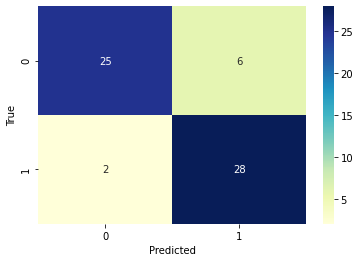

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='d' ,cmap="YlGnBu") #混淆矩陣
plt.xlabel("Predicted")
plt.ylabel("True")

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86        31
           1       0.82      0.93      0.87        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



### 隨機森林

In [55]:
# 隨機森林
model_forest=RandomForestClassifier(n_estimators=10) #選擇要用的模型
model_forest.fit(X_train,y_train)
print("隨機森林:"+str(model_forest.score(X_test,y_test))) #該模型預測出來的分數

隨機森林:0.7868852459016393


In [56]:
y_pred=model_forest.predict(X_test)
print(y_pred[:5]) #找出預測y的前五筆
print("\n")
print(y_test[:5]) #實際y的前五筆

[1 0 0 0 1]


134    1
139    1
179    0
225    0
259    0
Name: target, dtype: int64


Text(33.0, 0.5, 'True')

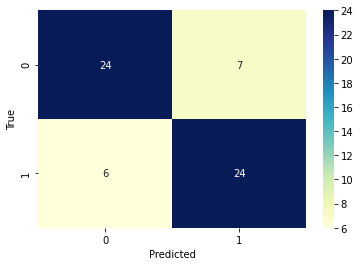

In [57]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='d' ,cmap="YlGnBu") #混淆矩陣
plt.xlabel("Predicted")
plt.ylabel("True")

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        31
           1       0.77      0.80      0.79        30

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



### 羅吉斯迴歸

In [59]:
# 羅吉斯迴歸
model_Log=LogisticRegression(C=1) #選擇要用的模型
model_Log.fit(X_train,y_train)
print("羅吉斯迴歸："+str(model_Log.score(X_test,y_test))) #該模型預測出來的分數

羅吉斯迴歸：0.8524590163934426


In [62]:
y_pred=model_Log.predict(X_test)
print(y_pred[:5]) #找出預測y的前五筆
print("\n")
print(y_test[:5]) #實際y的前五筆

[1 0 0 0 1]


134    1
139    1
179    0
225    0
259    0
Name: target, dtype: int64


Text(33.0, 0.5, 'True')

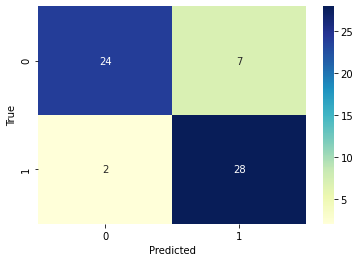

In [63]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='d' ,cmap="YlGnBu") #混淆矩陣
plt.xlabel("Predicted")
plt.ylabel("True")

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



### 決策樹

In [67]:
#決策樹
model_tree=DecisionTreeClassifier(criterion='gini') #選擇要用的模型
model_tree.fit(X_train,y_train)
print("決策樹："+ str(model_tree.score(X_test,y_test))) #該模型預測出來的分數

決策樹：0.7704918032786885


In [68]:
y_pred=model_tree.predict(X_test)
print(y_pred[:5]) #找出預測y的前五筆
print("\n")
print(y_test[:5]) #實際y的前五筆

[1 0 0 0 0]


134    1
139    1
179    0
225    0
259    0
Name: target, dtype: int64


Text(33.0, 0.5, 'True')

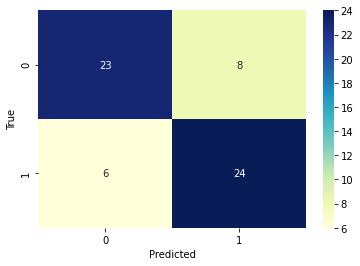

In [69]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='d' ,cmap="YlGnBu") #混淆矩陣
plt.xlabel("Predicted")
plt.ylabel("True")

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77        31
           1       0.75      0.80      0.77        30

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



###測試

In [79]:

perm = PermutationImportance(model_svm, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1049 ± 0.0941,cp
0.0459 ± 0.0435,oldpeak
0.0328 ± 0.0464,thal
0.0295 ± 0.0321,sex
0.0262 ± 0.0334,thalach
0.0164 ± 0.0359,ca
0.0131 ± 0.0245,slope
0.0131 ± 0.0245,trestbps
0.0131 ± 0.0482,exang
0 ± 0.0000,restecg
